In [1]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

In [2]:
import glob
glob.glob(r'/Users/harshitkoodi/Desktop/Cyclistic_Data/*.csv')

['/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Nov.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Jul.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Sept.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Jan.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2023_May.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Oct.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_June.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Aug.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/data.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Dec.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Mar.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Feb.csv',
 '/Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Apr.csv']

In [3]:
#Importing the data and merging all CSV files in one

all_dfs = []

for one_filename in glob.glob(r'/Users/harshitkoodi/Desktop/Cyclistic_Data/*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    
    all_dfs.append(new_df)

Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Nov.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Jul.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Sept.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Jan.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2023_May.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Oct.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_June.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Aug.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/data.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2022_Dec.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Mar.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Feb.csv
Loading /Users/harshitkoodi/Desktop/Cyclistic_Data/2023_Apr.csv


In [4]:
df = pd.concat(all_dfs)

In [5]:
df.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
426585,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,NaN,NaN
426586,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,NaN,NaN
426587,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual,NaN,NaN
426588,210B2ED6583DC231,classic_bike,2023-04-29 07:33:55,2023-04-29 07:38:57,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.886022,-87.624398,41.884576,-87.631890,casual,NaN,NaN
426589,D29CB39B9E3FC46A,electric_bike,2023-04-18 08:00:32,2023-04-18 08:02:35,Franklin St & Jackson Blvd,TA1305000025,Clark St & Ida B Wells Dr,TA1305000009,41.878134,-87.635255,41.875933,-87.630585,casual,NaN,NaN


In [6]:
column_names = df.columns
print(column_names)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day_of_week'],
      dtype='object')


In [7]:
df['member_casual'].value_counts()

member    3681265
casual    2450155
Name: member_casual, dtype: int64

In [8]:
#sns.histplot(data=df, x='member_casual')

In [43]:
#creating a new column 'ride_length' to calculate the time of each ride

from datetime import datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [11]:
df['ride_length']

0        0 days 00:09:32
1        0 days 00:14:30
2        0 days 00:14:07
3        0 days 00:15:41
4        0 days 00:18:26
               ...      
426585   0 days 00:09:58
426586   0 days 00:06:22
426587   0 days 00:05:25
426588   0 days 00:05:02
426589   0 days 00:02:03
Name: ride_length, Length: 6131420, dtype: timedelta64[ns]

In [12]:
df['ride_length'].mean()

Timedelta('0 days 00:18:51.249623904')

In [13]:
df['day_of_week'] = df['started_at'].dt.dayofweek


In [14]:
df['day_of_week'].head()
#monday 0 sunday 6

0    3
1    4
2    0
3    4
4    1
Name: day_of_week, dtype: int64

In [15]:
null_count = df['member_casual'].isnull().sum()

In [16]:
null_count

0

In [17]:
mean_member = df.loc[df['member_casual'] == 'member', 'ride_length'].mean()
mean_casual = df.loc[df['member_casual'] == 'casual', 'ride_length'].mean()

In [18]:
mean_casual

Timedelta('0 days 00:28:23.853001136')

In [19]:
mean_member

Timedelta('0 days 00:12:30.139590331')

In [20]:
from IPython.display import display, FileLink

np.random.seed(42)

# Get the number of rows to drop
num_rows_to_drop = int(len(df) * 0.2)

# Drop random rows
df = df.drop(np.random.choice(df.index, num_rows_to_drop, replace=False))

# Save the modified DataFrame to a new file or overwrite the original file
#df.to_csv('modified_file.csv', index=False)  # Replace 'modified_file.csv' with the desired file name

df.to_csv('data.csv', index=False)

# Provide a download link for the CSV file
display(FileLink('data.csv', result_html_prefix="Click here to download: "))

In [21]:
df.shape

(6131420, 15)

In [22]:
riders_by_day = df.groupby(['day_of_week', 'member_casual']).size()

In [23]:
riders_by_day

day_of_week  member_casual
0            casual           272915
             member           492390
1            casual           286493
             member           577120
2            casual           308724
             member           605946
3            casual           331747
             member           590968
4            casual           367481
             member           525309
5            casual           484076
             member           475426
6            casual           398719
             member           414106
dtype: int64

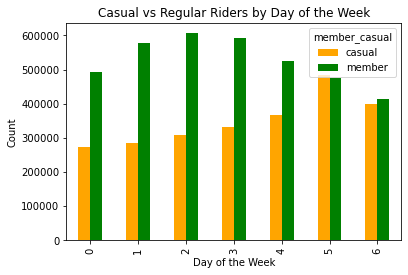

In [44]:
#Plotting Casual vs Regular Riders by Day of the Week

import matplotlib.pyplot as plt

#riders_by_day = riders_by_day.unstack()
colors = {'casual' : 'orange', 'member' : 'green'}

# Plot the data

riders_by_day.unstack().plot(kind='bar', color = colors)

# Set the labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Casual vs Regular Riders by Day of the Week')

# Show the plot
plt.show()

In [25]:
from datetime import datetime

df['month'] = pd.to_datetime(df['started_at']).dt.month
    

In [26]:
df['month']

0         11
1         11
2         11
3         11
4         11
          ..
426585     4
426586     4
426587     4
426588     4
426589     4
Name: month, Length: 6131420, dtype: int64

In [27]:
riders_by_month = df.groupby(['month', 'member_casual']).size()

In [28]:
riders_by_month

month  member_casual
1      casual            40210
       member           151037
2      casual            43217
       member           148175
3      casual            62690
       member           198102
4      casual           150022
       member           284879
5      casual           243027
       member           384184
6      casual           396074
       member           429321
7      casual           451383
       member           459238
8      casual           387561
       member           461417
9      casual           312947
       member           427053
10     casual           215792
       member           360320
11     casual           102127
       member           239952
12     casual            45105
       member           137587
dtype: int64

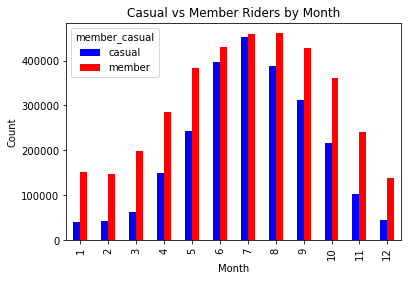

In [45]:
#Plotting Casual vs Member Riders by Month

import matplotlib.pyplot as plt

#riders_by_month.plot(kind='bar')

colors = {'casual': 'blue', 'member': 'red'}

# Plot the data

riders_by_month.unstack().plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Casual vs Member Riders by Month')

# Show the plot
plt.show()

In [30]:
df['ride_length'] = pd.to_timedelta(df['ride_length'], unit='minutes')
riders_avgtime_byday = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean()
riders_avgtime_byday = riders_avgtime_byday.unstack()



In [31]:
print(df['ride_length'].dtype)

timedelta64[ns]


In [32]:
null_counts = riders_avgtime_byday.isnull().sum()
print(null_counts)


member_casual
casual    0
member    0
dtype: int64


#colors = {'casual': 'blue', 'member': 'red'}

# Plot the data
riders_avgtime_byday.plot(kind='bar')

# Set the labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Time')
plt.title('Average Ride Time by Day of Week')

# Show the plot
plt.show()

In [39]:
bike_type = df.groupby(['rideable_type', 'member_casual']).size()

In [40]:
bike_type

rideable_type  member_casual
classic_bike   casual            903060
               member           1803736
docked_bike    casual            165494
electric_bike  casual           1381601
               member           1877529
dtype: int64

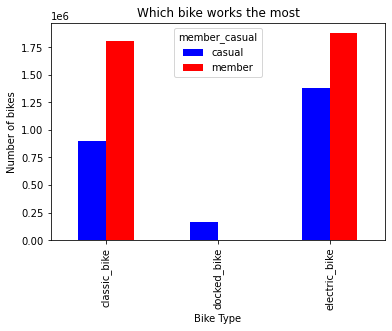

In [48]:
#Plotting Which bike works the most

colors = {'casual': 'blue', 'member': 'red'}

# Plot the data
bike_type.unstack().plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Bike Type')
plt.ylabel('Number of bikes')
plt.title('Which bike works the most')

# Show the plot
plt.show()